In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# load dataset
df_crab_groups = pd.read_csv('drive/MyDrive/data_science/crab-groups.csv')


In [ ]:
df_crab_groups.head()

,site,latitude,n,mean_mm,min_mm,max_mm,sd_mm,median_mm,date
0,GTM,30.0,28,12.40,7.55,14.9,1.80,12.60,2016-07-24
1,SI,31.4,30,9.85,6.64,13.6,1.79,9.55,2016-07-26
2,NIB,33.3,30,13.30,8.52,17.3,2.42,13.30,2016-07-28
3,ZI,34.0,35,12.10,8.05,15.7,2.01,12.00,2016-07-29
4,RC,34.7,25,12.50,9.40,17.6,2.34,12.10,2016-08-01


## Simple Linear Regression

In [ ]:
# take latitude to predict mean_mm using linear regression
x = df_crab_groups[['latitude']].values.reshape(-1,1)
y = df_crab_groups[['mean_mm']].values.reshape(-1,1)

simple_lr = LinearRegression() # create the model
simple_lr.fit(x, y) # train the model

y_hat = simple_lr.predict(x) # predict

In [ ]:
mean_squared_error(y, y_hat)

1.2486100789578567

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

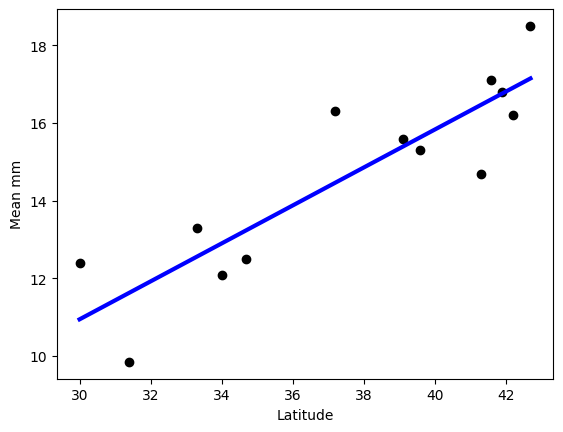

In [ ]:
plt.scatter(x, y, color='black')
plt.plot(x, y_hat, color='blue', linewidth=3)
plt.xlabel('Latitude')
plt.ylabel('Mean mm')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

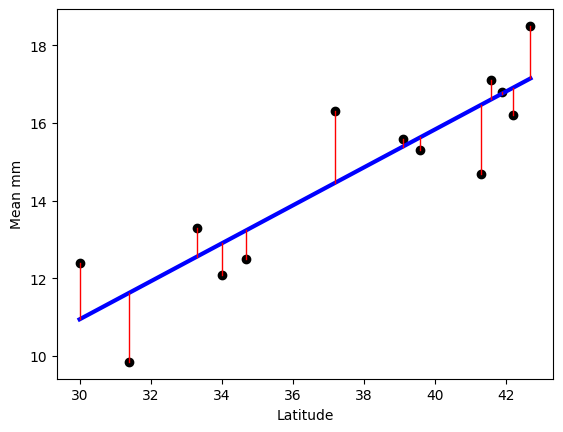

In [ ]:
plt.scatter(x, y, color='black')
plt.plot(x, y_hat, color='blue', linewidth=3)
# add line from actual plot to predicted line
for i in range(len(x)):
  plt.plot([x[i], x[i]], [y[i], y_hat[i]], color='red', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Mean mm')
plt

In [ ]:
print('Intercept: ', simple_lr.intercept_)
print('Coefficients: ', simple_lr.coef_)
print('R^2: ', simple_lr.score(x, y))
print('MSE: ', mean_squared_error(y, simple_lr.predict(x)))


Intercept:  [-3.70393483]
Coefficients:  [[0.48834592]]
R^2:  0.7774829925405429
MSE:  1.2486100789578567


## Multiple Linear Regression

In [ ]:
mpg_dataset = pd.read_csv('drive/MyDrive/data_science/mpg.csv')
# drop null values
mpg_dataset.dropna(inplace=True)
mpg_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
y = mpg_dataset['mpg'].values.reshape(-1,1) # target
x = mpg_dataset.drop(['mpg', 'origin', 'name'], axis=1) # features

x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [ ]:
multiple_lr = LinearRegression()
multiple_lr.fit(x, y)
y_hat = multiple_lr.predict(x)
mse = mean_squared_error(y, y_hat)
print('MSE: ', mse)
print('R^2: ', multiple_lr.score(x, y))
print('Intercept: ', multiple_lr.intercept_)
print('Coefficients: ', multiple_lr.coef_)

MSE:  11.590170981415225
R^2:  0.8092552890383932
Intercept:  [-14.53525048]
Coefficients:  [[-3.29859089e-01  7.67843024e-03 -3.91355574e-04 -6.79461791e-03
   8.52732469e-02  7.53367180e-01]]


## Polynomials

In [ ]:
# have a polynomial function with 2 degrees
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_polynomial = poly_features.fit_transform(x)
x_polynomial.shape

(392, 27)

In [ ]:
x.shape

(392, 6)

In [ ]:
multiple_lr = LinearRegression()
multiple_lr.fit(x_polynomial, y)
y_hat = multiple_lr.predict(x_polynomial)
mse = mean_squared_error(y, y_hat)
print('MSE: ', mse)
print('R^2: ', multiple_lr.score(x_polynomial, y))
print('Intercept: ', multiple_lr.intercept_)
print('Coefficients: ', multiple_lr.coef_)

MSE:  6.880808010717752
R^2:  0.8867594156038581
Intercept:  [314.31419006]
Coefficients:  [[ 7.83254724e+00 -4.63436107e-01  1.34076601e-01  2.05947622e-02
  -5.82530951e+00 -7.30654885e+00 -4.02998675e-01 -2.95478636e-03
   2.85094901e-02  5.23009744e-04  2.23132319e-01 -1.32425153e-01
   2.64370122e-05  1.56109768e-04  9.95174632e-06 -2.56246507e-03
   5.77564204e-03 -3.66455621e-04 -2.79665840e-05 -6.05515731e-03
  -1.78932803e-03  5.77583710e-07  7.03875653e-05 -4.11845095e-04
   2.25028567e-02  6.02654841e-02  5.33519018e-02]]


## Logistic Regression

In [ ]:
bc_dataset = pd.read_csv('drive/MyDrive/data_science/WisconsinBreastCancerDatabase.csv')
bc_dataset.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# convert disangosis column to 0 or 1 value
bc_dataset['Diagnosis'] = bc_dataset['Diagnosis'].map({'M': 1, 'B':0})
bc_dataset.head()


,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = bc_dataset[['Radius mean']].values.reshape(-1,1)
y = bc_dataset[['Diagnosis']].values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
simple_logit = LogisticRegression() # create model
# flatten y
# y = y.flatten()

simple_logit.fit(x, y) # train model
y_hat = simple_logit.predict(x) # predict

# get summary
print('Intercept: ', simple_logit.intercept_)
print('Coefficients: ', simple_logit.coef_)
print('R^2: ', simple_logit.score(x, y))
print('MSE: ', mean_squared_error(y, y_hat))

Intercept:  [-19.66972414]
Coefficients:  [[-6.97321380e-04  2.16873892e-01  1.04621380e+00]]
R^2:  0.8910369068541301
MSE:  0.10896309314586995


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Statistic Model

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
mpg_data = pd.read_csv('drive/MyDrive/data_science/mpg.csv')

In [ ]:
mpg_data.dropna(inplace=True)
print(mpg_data.head())
x = mpg_data.drop(['mpg', 'origin', 'name'], axis=1)
x = sm.add_constant(x)
x.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


,const,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.0,8,307.0,130.0,3504,12.0,70
1,1.0,8,350.0,165.0,3693,11.5,70
2,1.0,8,318.0,150.0,3436,11.0,70
3,1.0,8,304.0,150.0,3433,12.0,70
4,1.0,8,302.0,140.0,3449,10.5,70


In [ ]:
y = mpg_data.mpg

In [ ]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.79e-135
Time:                        01:09:43   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051   

In [ ]:
# Logistic Regression

bc_dataset = pd.read_csv('drive/MyDrive/data_science/WisconsinBreastCancerDatabase.csv')
bc_dataset.head()

# convert disangosis column to 0 or 1 value
bc_dataset['Diagnosis'] = bc_dataset['Diagnosis'].map({'M': 1, 'B':0})

y = bc_dataset[['Diagnosis']]
x = bc_dataset.drop(['Diagnosis', 'ID'], axis=1)
x = sm.add_constant(x[['Texture mean', 'Radius mean']])

model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.255820
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                  0.6126
Time:                        01:09:44   Log-Likelihood:                -145.56
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.105e-100
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.8494      1.774    -11.189      0.000     -23.326     -16.373
Texture mean     0.2181

# Coments and insights
Talk about using the two packages for implementing Linear Regression(statmodel and sklearn):

- - Using the statsmodel means using a constant, this allows for starting from the average which means that we have an expected range for the predicted values this is needed for the statsmodel because it will try to start from 0 which will probably be outside of the expected range.

sklearn does not require using a constant and to me seems easier to use and understand, mainly because of that. The constant isnt hard to add but how the data looks after adding the constant kind of muddies the waters for me so I would choose sklearn when using a linear regression model.